In [510]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import scipy.stats as stats 

from IPython.display import set_matplotlib_formats

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus =True)
set_matplotlib_formats('retina')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

import re

import warnings 
warnings.filterwarnings('ignore')


# 학습/검증 데이터 분할 / 매개변수 튜닝 / 교차검증 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# 평가 
from sklearn.metrics import classification_report
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus
pd.options.display.float_format = '{:.2f}'.format
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [358]:
import pycaret

In [359]:
from sklearn.cluster import *

In [360]:
from pycaret.classification import *

In [361]:
estate = pd.read_csv('../data/total_apt.csv')
subway = pd.read_csv('../data/dsaa.csv',encoding='cp949')

In [362]:
estate.info()
print(estate.shape,subway.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471130 entries, 0 to 471129
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   시군구     471130 non-null  object 
 1   법정동명    471130 non-null  object 
 2   번지      470863 non-null  object 
 3   건물명     471130 non-null  object 
 4   전용면적    471130 non-null  float64
 5   거래날짜    471130 non-null  object 
 6   거래금액    471130 non-null  int64  
 7   층정보     471130 non-null  int64  
 8   건축년도    471130 non-null  int64  
 9   도로명     471130 non-null  object 
 10  신축구분    471130 non-null  object 
 11  평당금액    471130 non-null  float64
 12  최소거리    471130 non-null  float64
 13  역명      471130 non-null  object 
 14  위도      471130 non-null  float64
 15  경도      471130 non-null  float64
 16  역세권여부   471130 non-null  int64  
dtypes: float64(5), int64(4), object(8)
memory usage: 61.1+ MB
(471130, 17) (759, 5)


In [363]:
subway

,전철역코드,전철역명,전철명명(영문),호선,외부코드
0,0159,동묘앞,Dongmyo,01호선,127
1,0416,미아사거리,Miasamgeori,04호선,416
2,0423,충무로,Chungmuro,04호선,423
3,1004,노량진,Noryangjin,01호선,136
4,1010,한남,Hannam,경의선,K113
...,...,...,...,...,...
754,4512,운동장.송담대,Stadium Songdam College,용인경전철,Y120
755,4513,고진,Gojin,용인경전철,Y121
756,4514,보평,Bopyeong,용인경전철,Y123
757,4515,둔전,Dunjeon,용인경전철,Y125


In [364]:
df=subway[['전철역명','호선']]

In [162]:
df.to_csv('../data/subway.csv',index=False)

In [343]:
df = df.groupby('전철역명')['호선'].apply(', '.join).reset_index()

In [365]:
subway[subway['전철역명']=='대림']

,전철역코드,전철역명,전철명명(영문),호선,외부코드
247,0233,대림,Daerim,02호선,233
512,2746,대림,Daerim,07호선,744


In [279]:
estate.describe()

,전용면적,거래금액,층정보,건축년도,평당금액,최소거리,위도,경도,역세권여부
count,471130.00,471130.00,471130.00,471130.00,471130.00,471130.00,471130.00,471130.00,471130.00
mean,78.64,694720597.65,9.06,1999.56,29106083.25,0.61,37.55,127.00,0.47
std,30.24,508083123.74,6.14,9.60,15876083.91,0.42,0.06,0.09,0.50
min,10.02,11000000.00,-3.00,1961.00,527003.48,0.02,37.44,126.81,0.00
25%,59.76,385000000.00,4.00,1993.00,18328476.82,0.33,37.51,126.92,0.00
50%,84.07,551000000.00,8.00,2000.00,24491321.34,0.53,37.55,127.02,0.00
75%,84.97,833000000.00,13.00,2006.00,34771094.85,0.76,37.60,127.07,1.00
max,424.32,11500000000.00,69.00,2021.00,229997212.20,3.40,37.69,127.18,1.00


In [318]:
df

,전철역명,호선
0,4?19민주묘지,우이신설경전철
1,가능,01호선
2,가락시장,"03호선, 08호선"
3,가산디지털단지,"01호선, 07호선"
4,가양,09호선
...,...,...
623,회현,04호선
624,효자,의정부경전철
625,효창공원앞,"경의선, 06호선"
626,흑석,09호선


In [9]:
import folium as gg

In [10]:
gg_map=gg.Map(location=[37.5,126.98],zoom_start=8)

In [19]:
gg_map

In [20]:
for i in range(len(estate)):
    marker1 = gg.Marker([estate.loc[i]['위도'],estate.loc[i]['경도']],
                        icon=gg.Icon(color='green'))
    marker1.add_to(gg_map)

In [ ]:
gg_map

In [ ]:
for i in range(len(estate)):
    marker1 = gg.Marker([estate.loc[i]['위도'],estate.loc[i]['경도']],
                        popup=estate.loc[i]['역세권여부'],
                        icon=gg.Icon(color='green'))
    marker1.add_to(gg_map)

In [293]:
estate.isnull().sum()

시군구      0  
법정동명     0  
번지       267
건물명      0  
전용면적     0  
거래날짜     0  
거래금액     0  
층정보      0  
건축년도     0  
도로명      0  
신축구분     0  
평당금액     0  
최소거리     0  
역명       0  
위도       0  
경도       0  
역세권여부    0  
자치구      0  
dtype: int64

In [178]:
estate[estate['번지'].isna()]

,시군구,법정동명,번지,건물명,전용면적,거래날짜,거래금액,층정보,건축년도,도로명,신축구분,평당금액,최소거리,역명,위도,경도,역세권여부
67,서울특별시 강남구,자곡동,NaN,래미안포레,84.99,2016-01-21 0:00,788000000,6,2014,밤고개로21길 25,신축,30596540.77,1.37,복정,37.47,127.11,0
12539,서울특별시 강남구,자곡동,NaN,래미안포레,84.99,2016-03-21 0:00,786000000,6,2014,밤고개로21길 25,신축,30518884.57,1.37,복정,37.47,127.11,0
20782,서울특별시 강남구,자곡동,NaN,래미안포레,84.99,2016-04-13 0:00,785500000,11,2014,밤고개로21길 25,신축,30499470.53,1.37,복정,37.47,127.11,0
20783,서울특별시 강남구,자곡동,NaN,래미안포레,84.99,2016-04-16 0:00,730000000,3,2014,밤고개로21길 25,신축,28344511.12,1.37,복정,37.47,127.11,0
30487,서울특별시 강남구,자곡동,NaN,래미안포레,84.99,2016-05-11 0:00,800000000,2,2014,밤고개로21길 25,신축,31062477.94,1.37,복정,37.47,127.11,0
30503,서울특별시 강남구,자곡동,NaN,래미안포레,84.99,2016-05-15 0:00,760000000,4,2014,밤고개로21길 25,신축,29509354.04,1.37,복정,37.47,127.11,0
35081,서울특별시 서초구,내곡동,NaN,서초포레스타2단지,84.48,2016-05-31 0:00,830000000,10,2015,헌릉로8길 45,신축,32421875.00,1.11,청계산입구,37.46,127.06,0
47291,서울특별시 서초구,신원동,NaN,힐스테이트 서초 젠트리스,84.99,2016-06-04 0:00,930000000,1,2014,헌릉로8길 10-12,신축,36110130.60,1.11,청계산입구,37.46,127.06,0
50994,서울특별시 강남구,자곡동,NaN,래미안포레,101.51,2016-06-17 0:00,920000000,4,2014,밤고개로21길 25,신축,29908383.41,1.37,복정,37.47,127.11,0
50995,서울특별시 강남구,자곡동,NaN,래미안포레,59.97,2016-06-05 0:00,640000000,10,2014,밤고개로21길 25,신축,35217608.80,1.37,복정,37.47,127.11,0


In [366]:
def dd(a):
    a= a.split(" ")[1:]
    a=" ".join(a)
    return a

In [367]:
def ddd(text):
    regex = "\(.*\)|\s-\s.*"
    text=re.sub(regex,'',text)
    out = " ".join(text.split())
    return out

In [368]:
estate['역명']=estate['역명'].apply(ddd)

In [369]:
estate['자치구']=estate['시군구'].apply(dd)

In [370]:
estate['자치구']

0         중랑구 
1         은평구 
2         성동구 
3         은평구 
4         은평구 
         ...  
471125    동대문구
471126    동대문구
471127    영등포구
471128    동대문구
471129    구로구 
Name: 자치구, Length: 471130, dtype: object

In [371]:
estate.pivot_table(index = '자치구',values='평당금액',aggfunc='mean').sort_values(by='평당금액',ascending=False)

,평당금액
자치구,
강남구,55080550.14
서초구,48564813.80
송파구,40115021.93
용산구,39887498.24
성동구,34805391.69
마포구,33235434.87
광진구,31235125.20
동작구,29750381.58
중구,29388714.95


In [377]:
estate.pivot_table(index = '호선',values='평당금액',aggfunc='mean').sort_values(by='평당금액',ascending=False)

,평당금액
호선,
수인분당선,47507599.54
03호선,39606561.73
08호선,38093165.49
신분당선,36414196.17
09호선,35543399.56
공항철도,32983705.01
경의선,31021253.33
02호선,30849262.51
05호선,29130482.65


<AxesSubplot:xlabel='평당금액', ylabel='자치구'>

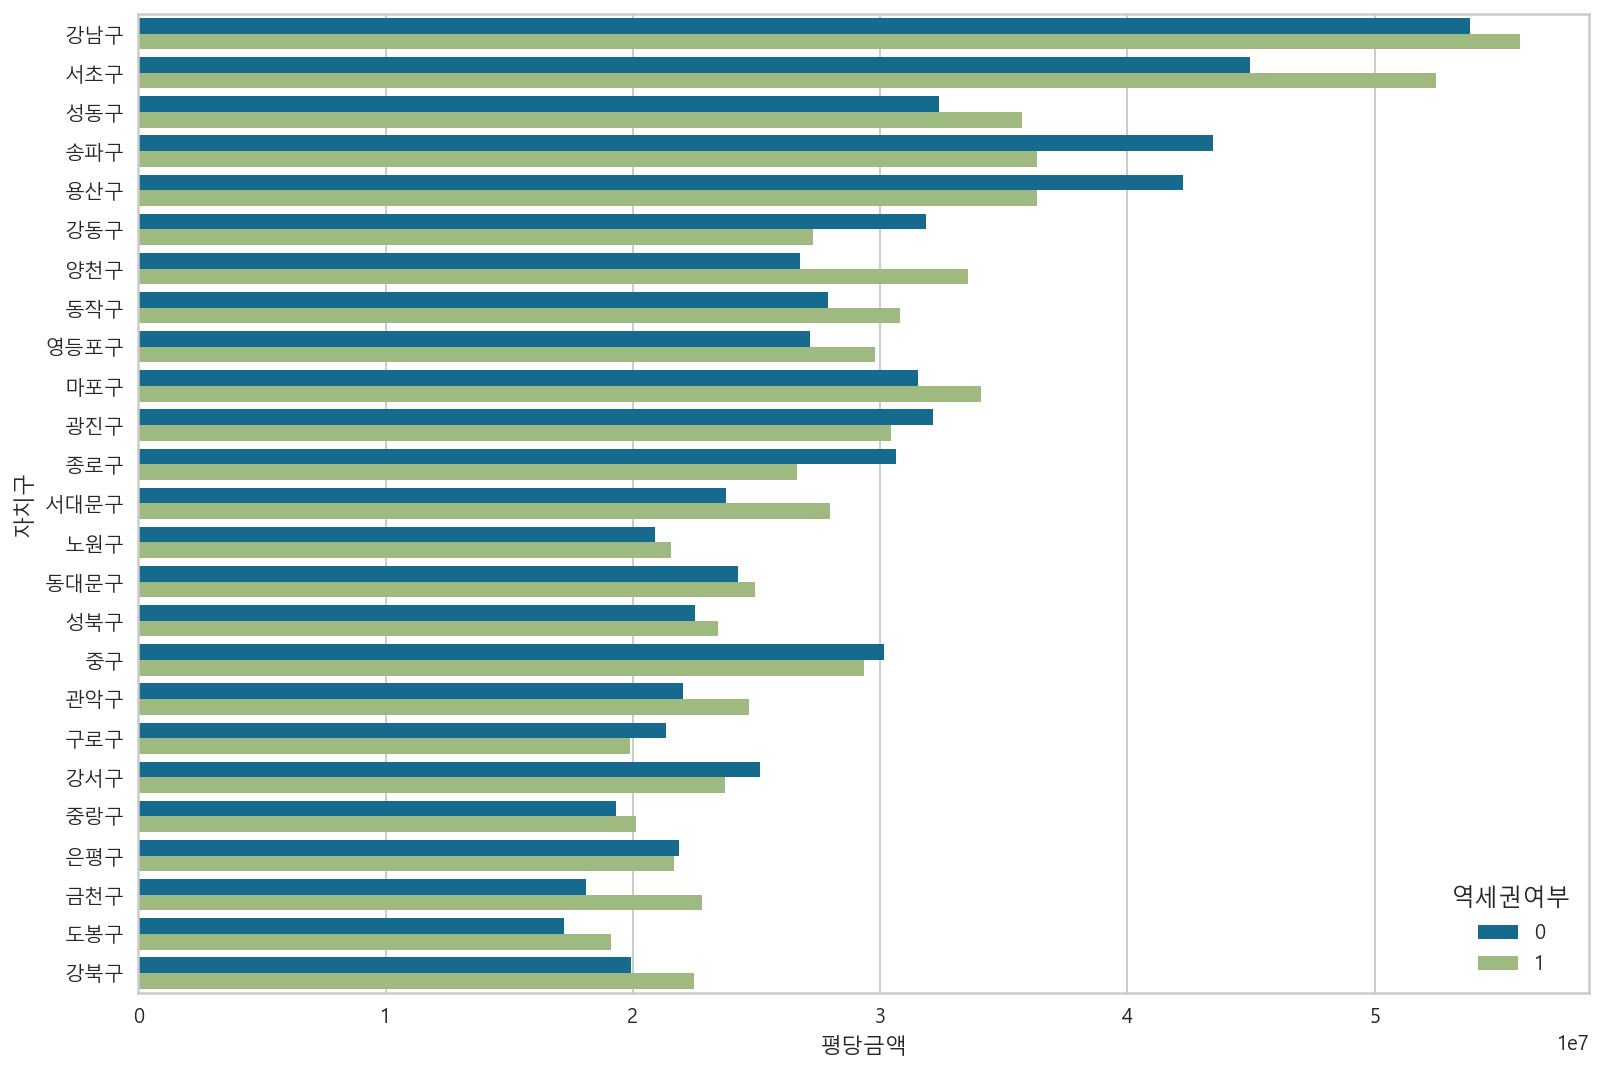

In [372]:
plt.figure(figsize=(13,9))
sns.barplot(data=estate.sort_values(by='평당금액',ascending=False),x='평당금액',y='자치구',hue='역세권여부',ci=None)

<AxesSubplot:xlabel='거래금액', ylabel='자치구'>

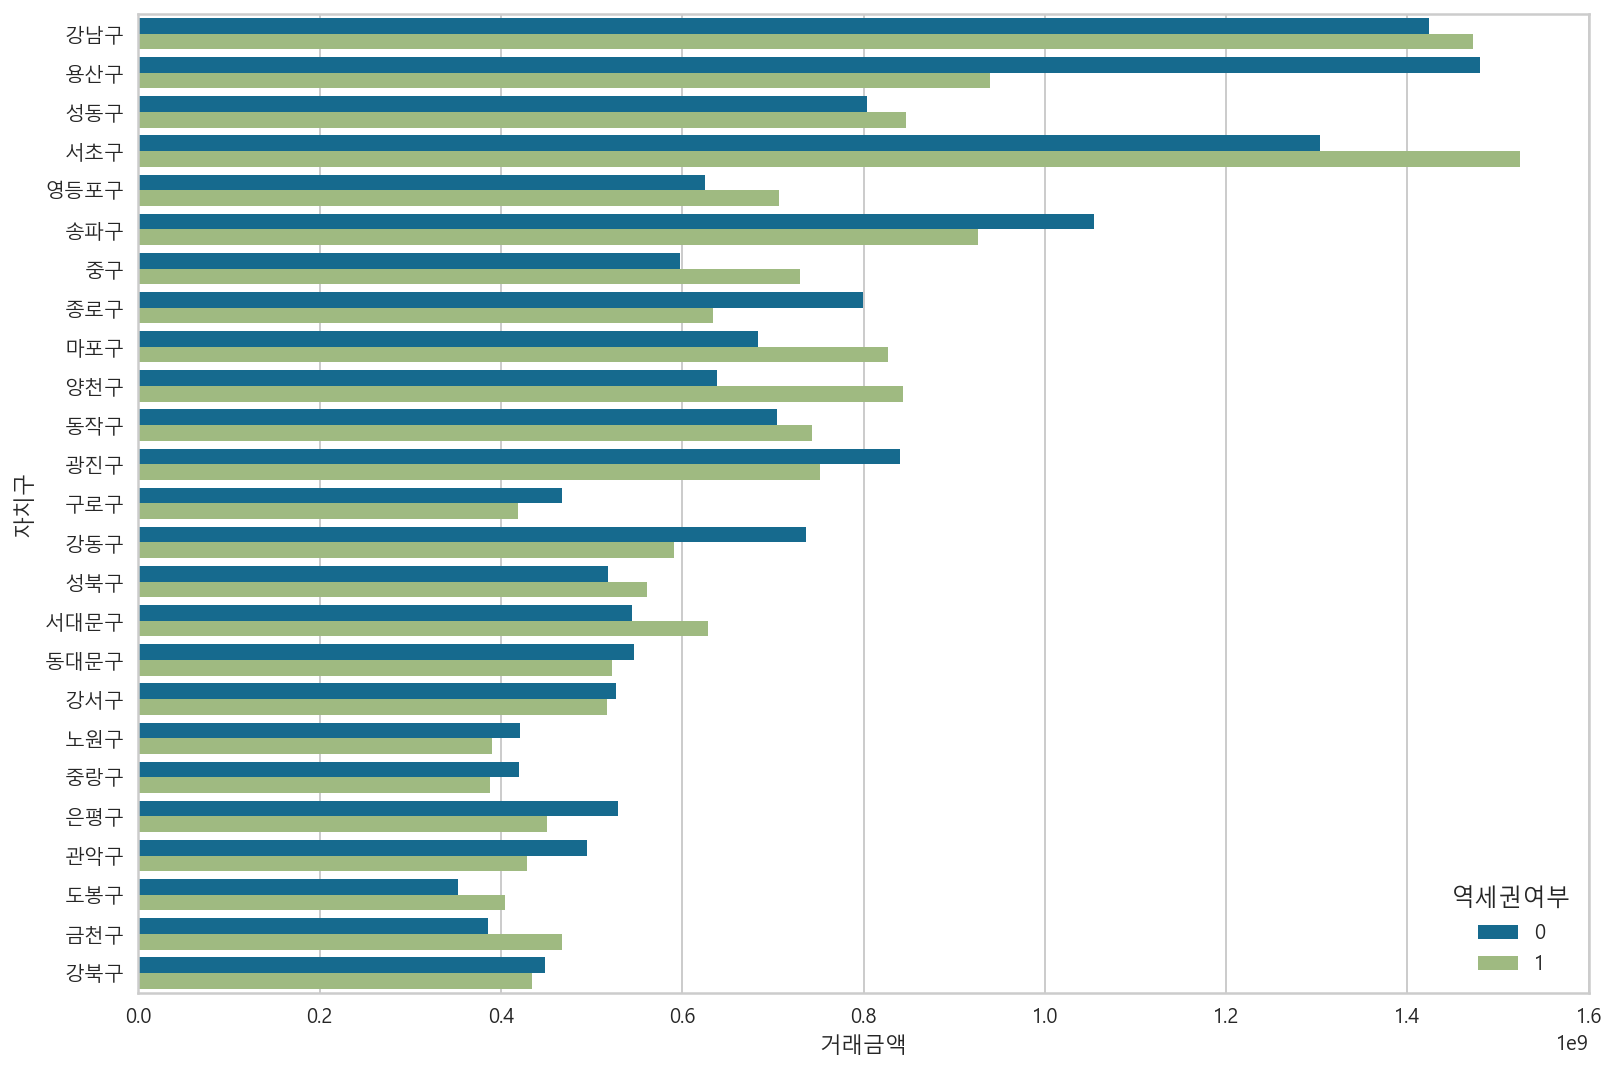

In [43]:
plt.figure(figsize=(13,9))
sns.barplot(data=estate.sort_values(by='거래금액',ascending=False),x='거래금액',y='자치구',hue='역세권여부',ci=None)

<AxesSubplot:xlabel='거래금액', ylabel='호선'>

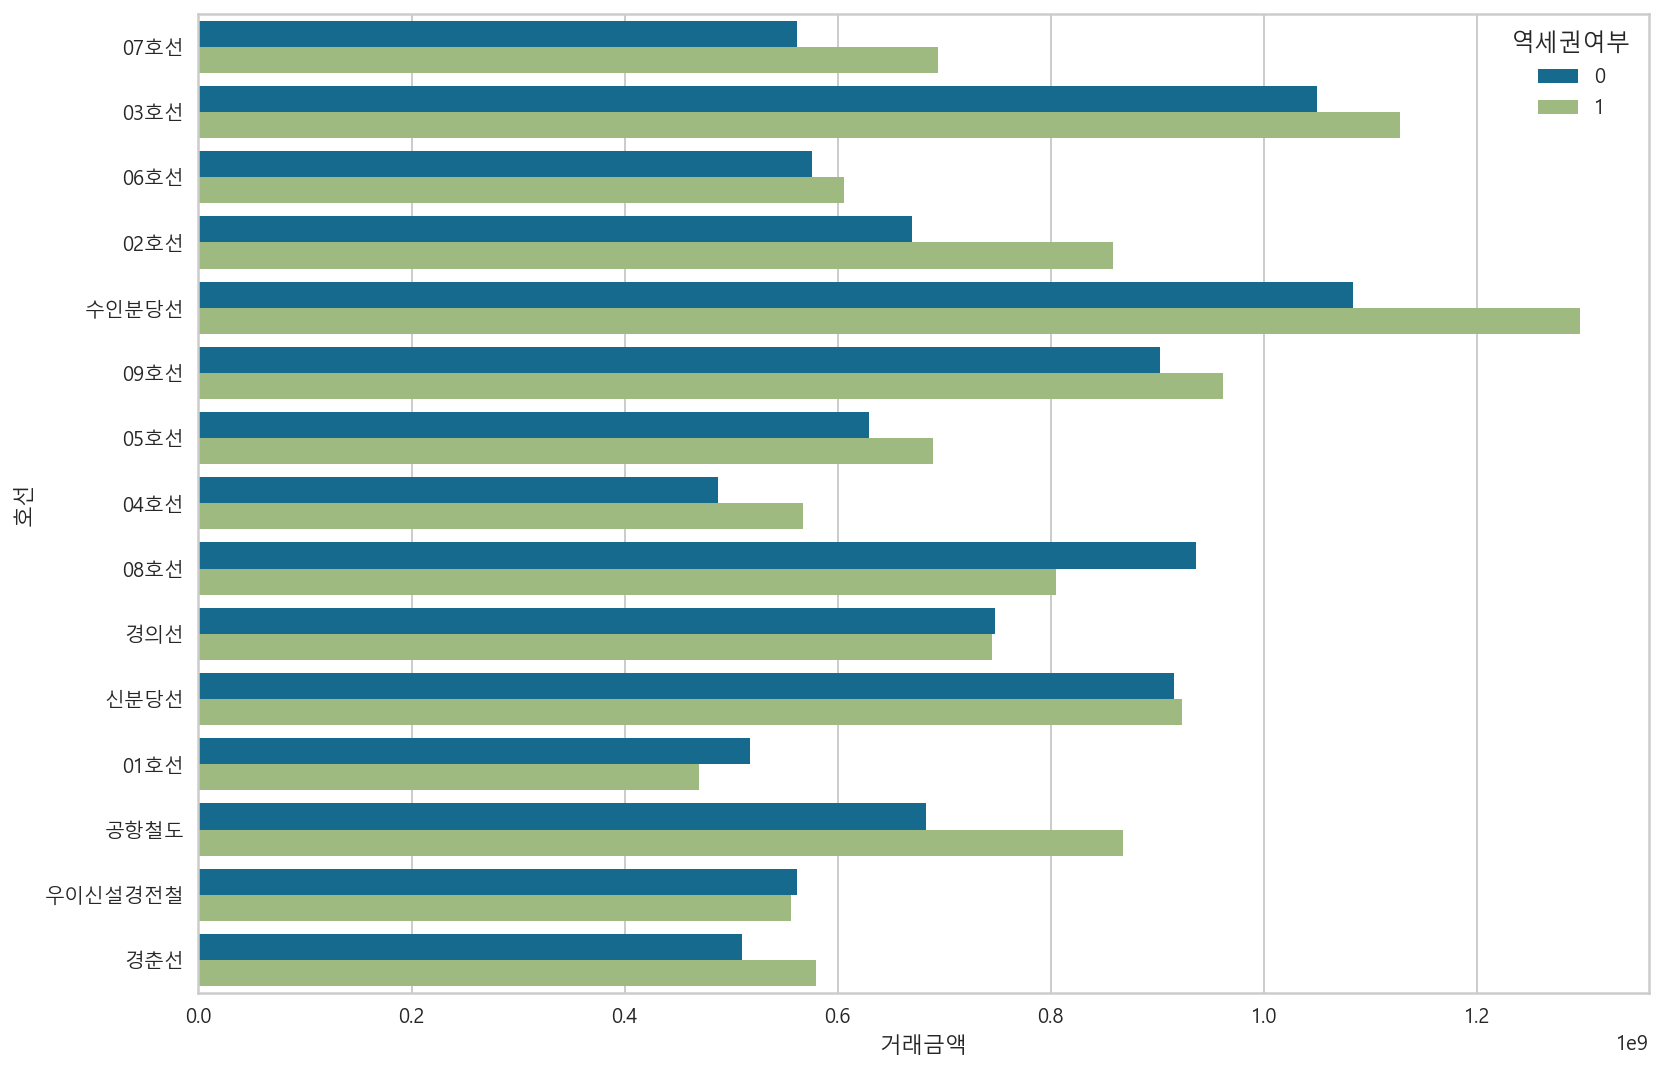

In [379]:
plt.figure(figsize=(13,9))
sns.barplot(data=estate.sort_values(by='거래금액',ascending=False),x='거래금액',y='호선',hue='역세권여부',ci=None)

In [373]:
df.rename(columns={'전철역명':'역명'},inplace=True)

In [374]:
estate = estate.merge(df,on='역명',how='left')

In [375]:
estate.shape

(607370, 19)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


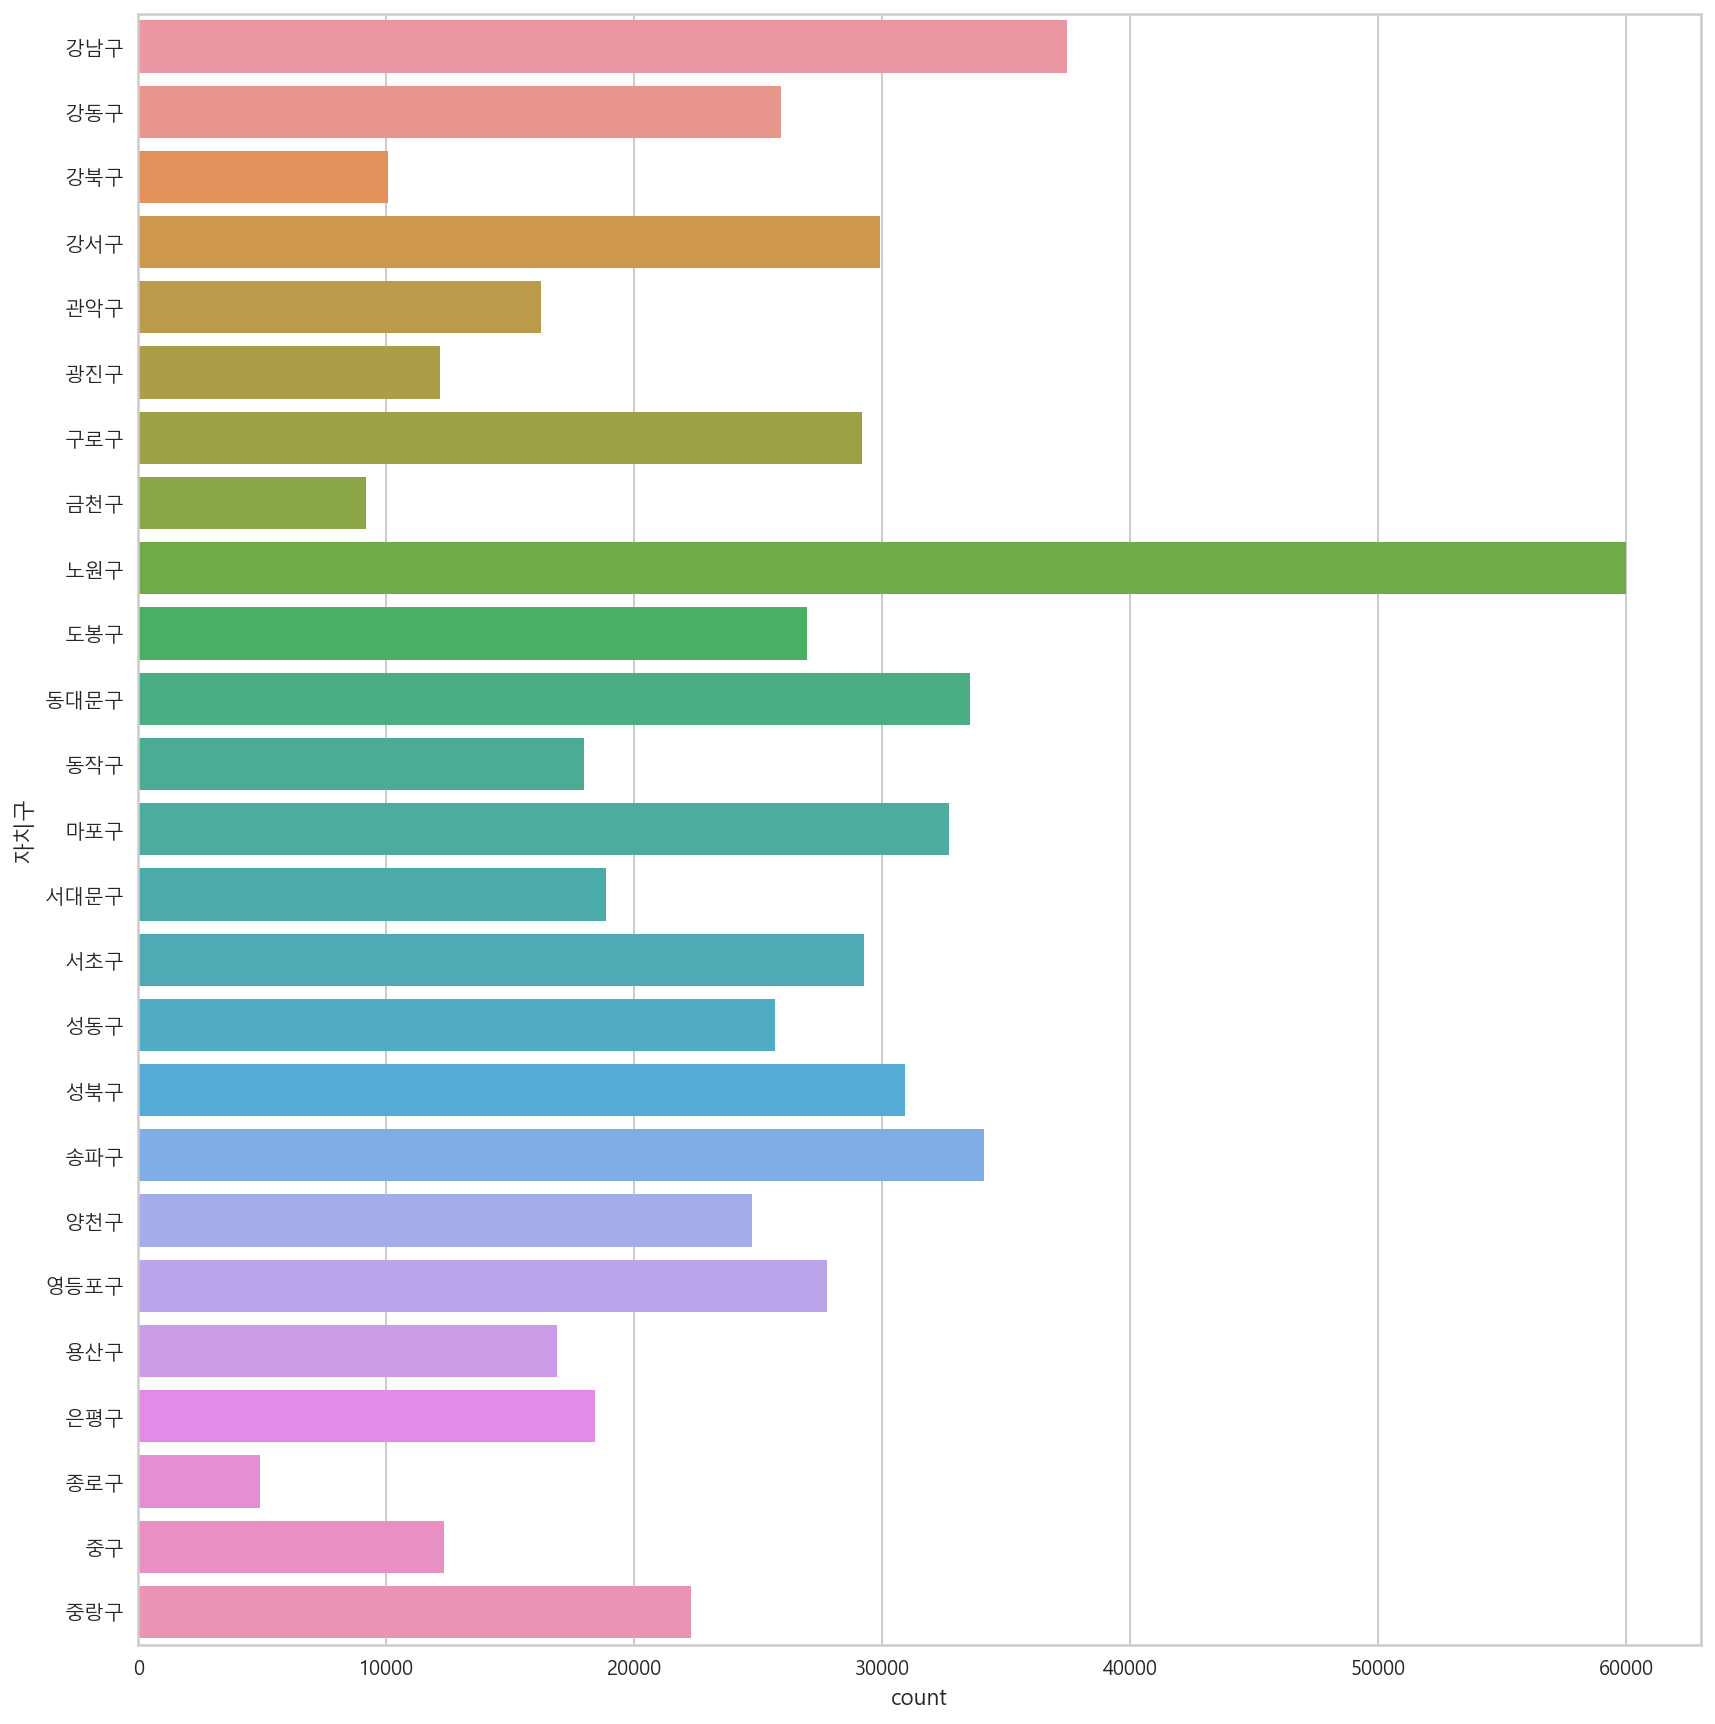

In [305]:
plt.figure(figsize=(14,15))
sns.countplot(data=estate.sort_values(by='자치구'),y='자치구')
plt.legend()

In [233]:
estate.isnull().sum()

시군구      0  
법정동명     0  
번지       325
건물명      0  
전용면적     0  
거래날짜     0  
거래금액     0  
층정보      0  
건축년도     0  
도로명      0  
신축구분     0  
평당금액     0  
최소거리     0  
역명       0  
위도       0  
경도       0  
역세권여부    0  
자치구      0  
호선       0  
dtype: int64

In [380]:
collist = list(estate.columns)

In [381]:
def dup(df,col):
    collist = list(df.columns)
    
    for i in col:
        collist.remove(i)
    
    return(df.duplicated(subset = collist, keep = False).sum())

In [382]:
collist.remove('호선')

In [383]:
for i in collist:
    print('호선', '& %-13s' % i, f' 외 중복 데이터 : {dup(estate,[i,"호선"])}건')

호선 & 시군구            외 중복 데이터 : 243125건
호선 & 법정동명           외 중복 데이터 : 243129건
호선 & 번지             외 중복 데이터 : 243125건
호선 & 건물명            외 중복 데이터 : 243125건
호선 & 전용면적           외 중복 데이터 : 243125건
호선 & 거래날짜           외 중복 데이터 : 268348건
호선 & 거래금액           외 중복 데이터 : 243125건
호선 & 층정보            외 중복 데이터 : 246777건
호선 & 건축년도           외 중복 데이터 : 243125건
호선 & 도로명            외 중복 데이터 : 243133건
호선 & 신축구분           외 중복 데이터 : 243125건
호선 & 평당금액           외 중복 데이터 : 243125건
호선 & 최소거리           외 중복 데이터 : 243125건
호선 & 역명             외 중복 데이터 : 243125건
호선 & 위도             외 중복 데이터 : 243125건
호선 & 경도             외 중복 데이터 : 243125건
호선 & 역세권여부          외 중복 데이터 : 243125건
호선 & 자치구            외 중복 데이터 : 243125건


In [385]:
estate.drop_duplicates(['호선','평당금액'],keep='first',inplace=True)

In [386]:
aa =estate.pivot_table(index='호선',values='평당금액',aggfunc='mean').sort_values(by=
                                                                        '평당금액',ascending=False).reset_index()

<AxesSubplot:xlabel='평당금액', ylabel='호선'>

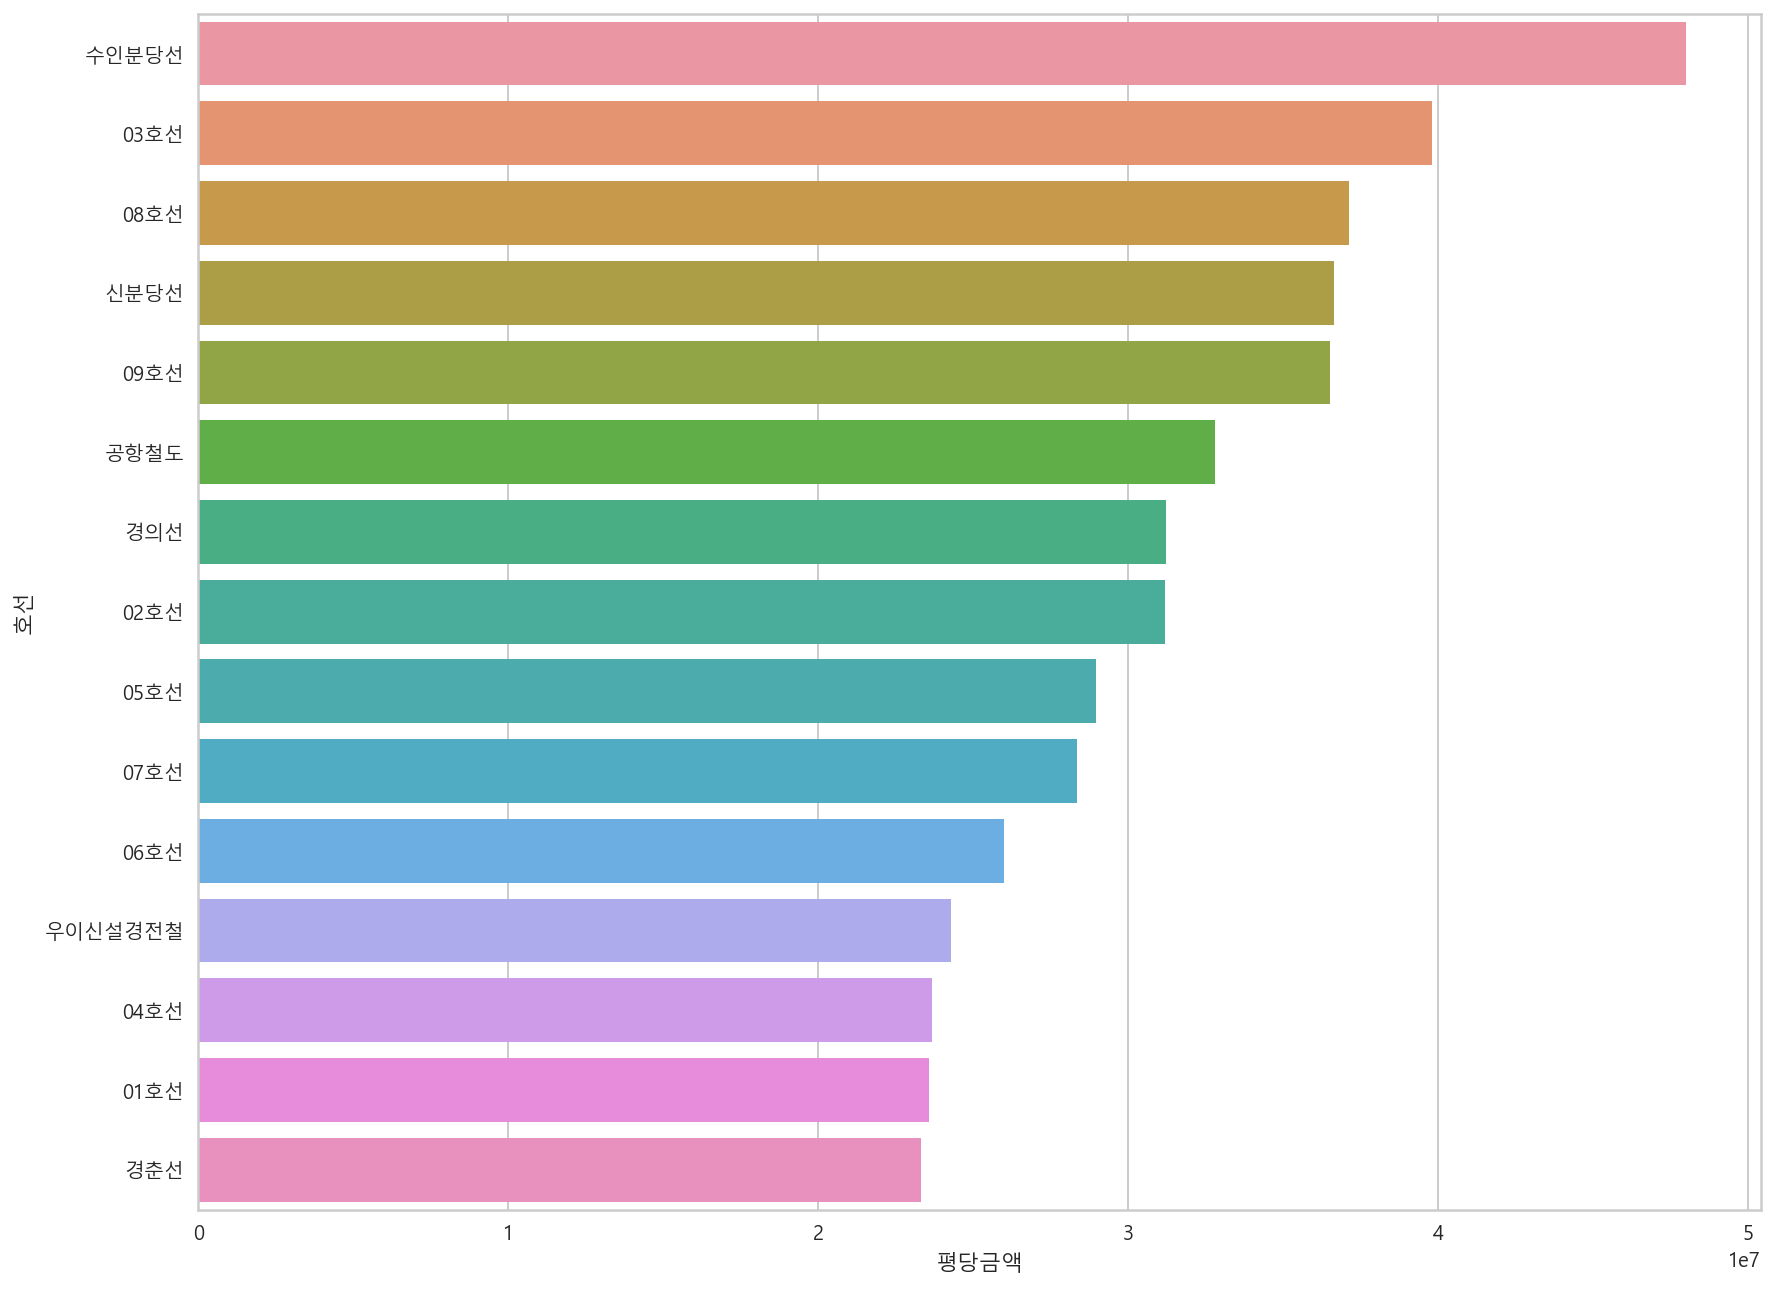

In [387]:
plt.figure(figsize=(14,11))
sns.barplot(data=aa,x=aa.평당금액,y=aa.호선,ci=None)

In [308]:
estate = estate.groupby('호선')['역명'].apply(', '.join).reset_index()

In [388]:
estate.shape

(383766, 19)

In [389]:
estate

,시군구,법정동명,번지,건물명,전용면적,거래날짜,거래금액,층정보,건축년도,도로명,신축구분,평당금액,최소거리,역명,위도,경도,역세권여부,자치구,호선
0,서울특별시 중랑구,상봉동,63,건영2차아파트,84.96,2016-01-15 0:00,358000000,19,1996,신내로7나길 24,구축,13905367.23,1.07,상봉,37.60,127.10,0,중랑구,경춘선
1,서울특별시 중랑구,상봉동,63,건영2차아파트,84.96,2016-01-15 0:00,358000000,19,1996,신내로7나길 24,구축,13905367.23,1.07,상봉,37.60,127.10,0,중랑구,경의선
2,서울특별시 중랑구,상봉동,63,건영2차아파트,84.96,2016-01-15 0:00,358000000,19,1996,신내로7나길 24,구축,13905367.23,1.07,상봉,37.60,127.10,0,중랑구,07호선
3,서울특별시 은평구,불광동,643,북한산 힐스테이트7차,84.89,2016-01-26 0:00,552000000,15,2011,통일로 796,신축,21458105.10,0.69,녹번,37.60,126.94,0,은평구,03호선
4,서울특별시 성동구,행당동,345,두산,84.87,2016-01-18 0:00,450000000,17,1997,고산자로16길 8-1,구축,17497348.89,0.44,왕십리,37.57,127.04,1,성동구,경의선
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607361,서울특별시 노원구,공릉동,751,대주파크빌아파트,65.77,2021-05-01 0:00,555000000,7,2003,섬밭로 52,구축,27847889.55,0.21,태릉입구,37.62,127.07,1,노원구,06호선
607362,서울특별시 노원구,공릉동,751,대주파크빌아파트,65.77,2021-05-01 0:00,555000000,7,2003,섬밭로 52,구축,27847889.55,0.21,태릉입구,37.62,127.07,1,노원구,07호선
607366,서울특별시 영등포구,영등포동1가,145,내이처해밀,15.08,2021-05-17 0:00,140000000,13,2012,경인로114길 62,신축,30644733.35,0.19,신길,37.52,126.92,1,영등포구,01호선
607367,서울특별시 영등포구,영등포동1가,145,내이처해밀,15.08,2021-05-17 0:00,140000000,13,2012,경인로114길 62,신축,30644733.35,0.19,신길,37.52,126.92,1,영등포구,05호선


In [392]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383766 entries, 0 to 607368
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   시군구     383766 non-null  object 
 1   법정동명    383766 non-null  object 
 2   번지      383528 non-null  object 
 3   건물명     383766 non-null  object 
 4   전용면적    383766 non-null  float64
 5   거래날짜    383766 non-null  object 
 6   거래금액    383766 non-null  int64  
 7   층정보     383766 non-null  int64  
 8   건축년도    383766 non-null  int64  
 9   도로명     383766 non-null  object 
 10  신축구분    383766 non-null  object 
 11  평당금액    383766 non-null  float64
 12  최소거리    383766 non-null  float64
 13  역명      383766 non-null  object 
 14  위도      383766 non-null  float64
 15  경도      383766 non-null  float64
 16  역세권여부   383766 non-null  int64  
 17  자치구     383766 non-null  object 
 18  호선      383766 non-null  object 
dtypes: float64(5), int64(4), object(10)
memory usage: 58.6+ MB


In [393]:
df = estate.copy()

In [394]:
df['거래날짜']=pd.to_datetime(df['거래날짜'])

In [396]:
datetime = df['거래날짜']

In [397]:
df['거래년도']=datetime.dt.year

In [398]:
df['거래월']=datetime.dt.month

In [401]:
df['거래일']=datetime.dt.day

In [408]:
df

,시군구,법정동명,번지,건물명,전용면적,거래날짜,거래금액,층정보,건축년도,도로명,신축구분,평당금액,최소거리,역명,위도,경도,역세권여부,자치구,호선,거래년도,거래월,거래일
0,서울특별시 중랑구,상봉동,63,건영2차아파트,84.96,2016-01-15,358000000,19,1996,신내로7나길 24,구축,13905367.23,1.07,상봉,37.60,127.10,0,중랑구,경춘선,2016,1,15
1,서울특별시 중랑구,상봉동,63,건영2차아파트,84.96,2016-01-15,358000000,19,1996,신내로7나길 24,구축,13905367.23,1.07,상봉,37.60,127.10,0,중랑구,경의선,2016,1,15
2,서울특별시 중랑구,상봉동,63,건영2차아파트,84.96,2016-01-15,358000000,19,1996,신내로7나길 24,구축,13905367.23,1.07,상봉,37.60,127.10,0,중랑구,07호선,2016,1,15
3,서울특별시 은평구,불광동,643,북한산 힐스테이트7차,84.89,2016-01-26,552000000,15,2011,통일로 796,신축,21458105.10,0.69,녹번,37.60,126.94,0,은평구,03호선,2016,1,26
4,서울특별시 성동구,행당동,345,두산,84.87,2016-01-18,450000000,17,1997,고산자로16길 8-1,구축,17497348.89,0.44,왕십리,37.57,127.04,1,성동구,경의선,2016,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607361,서울특별시 노원구,공릉동,751,대주파크빌아파트,65.77,2021-05-01,555000000,7,2003,섬밭로 52,구축,27847889.55,0.21,태릉입구,37.62,127.07,1,노원구,06호선,2021,5,1
607362,서울특별시 노원구,공릉동,751,대주파크빌아파트,65.77,2021-05-01,555000000,7,2003,섬밭로 52,구축,27847889.55,0.21,태릉입구,37.62,127.07,1,노원구,07호선,2021,5,1
607366,서울특별시 영등포구,영등포동1가,145,내이처해밀,15.08,2021-05-17,140000000,13,2012,경인로114길 62,신축,30644733.35,0.19,신길,37.52,126.92,1,영등포구,01호선,2021,5,17
607367,서울특별시 영등포구,영등포동1가,145,내이처해밀,15.08,2021-05-17,140000000,13,2012,경인로114길 62,신축,30644733.35,0.19,신길,37.52,126.92,1,영등포구,05호선,2021,5,17


<AxesSubplot:xlabel='거래년도', ylabel='평당금액'>

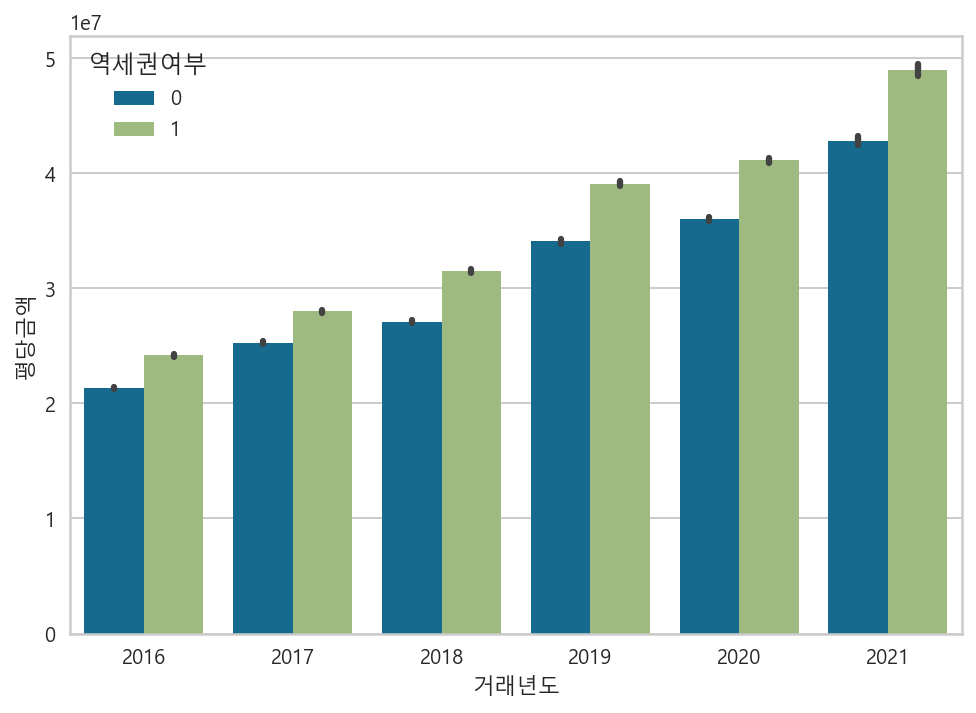

In [426]:
sns.barplot(data=df,x='거래년도',y='평당금액',hue='역세권여부')

<AxesSubplot:xlabel='거래일', ylabel='평당금액'>

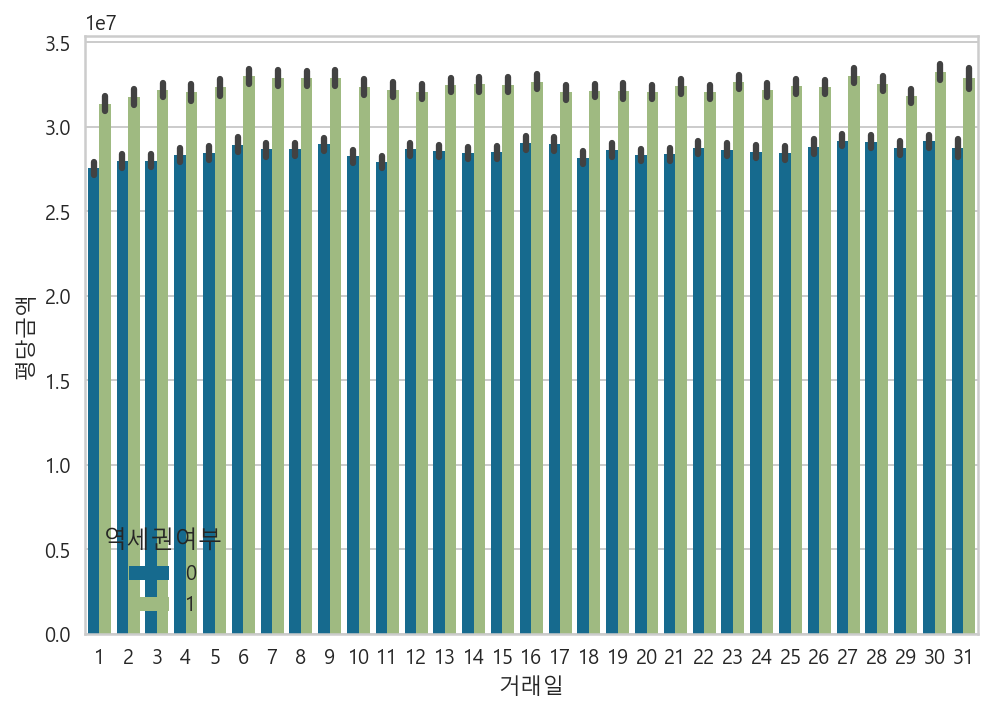

In [430]:
sns.barplot(data=df,x='거래일',y='평당금액',hue='역세권여부')

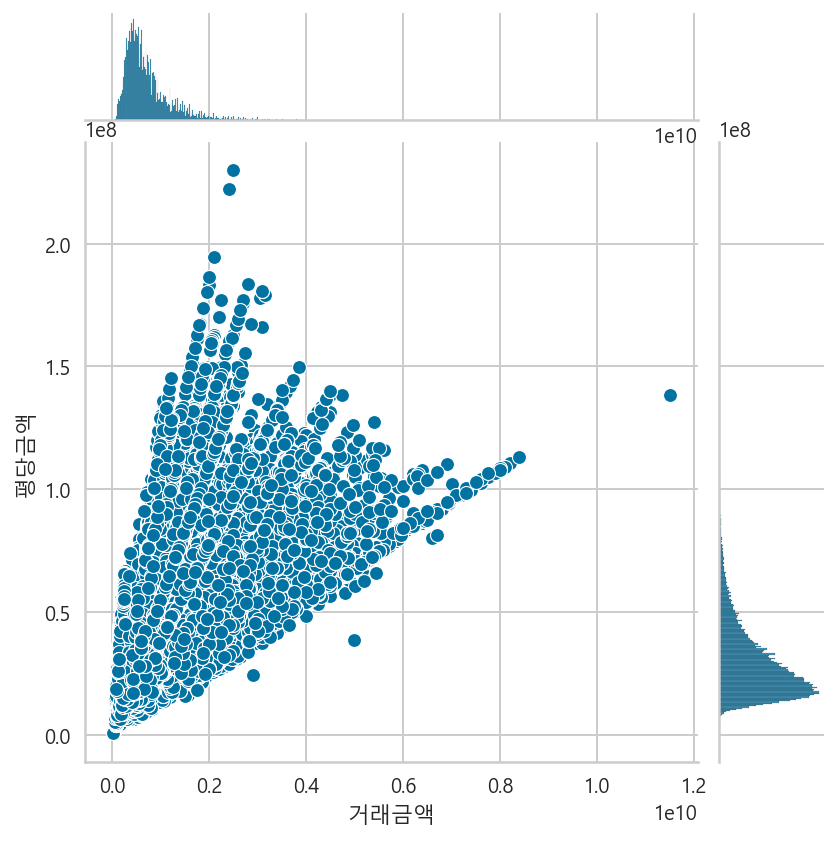

In [428]:
sns.jointplot(data=df,x='거래금액',y='평당금액')

In [417]:
stats.normaltest(df['평당금액'])

NormaltestResult(statistic=147952.71318303538, pvalue=0.0)

<AxesSubplot:xlabel='신축구분', ylabel='평당금액'>

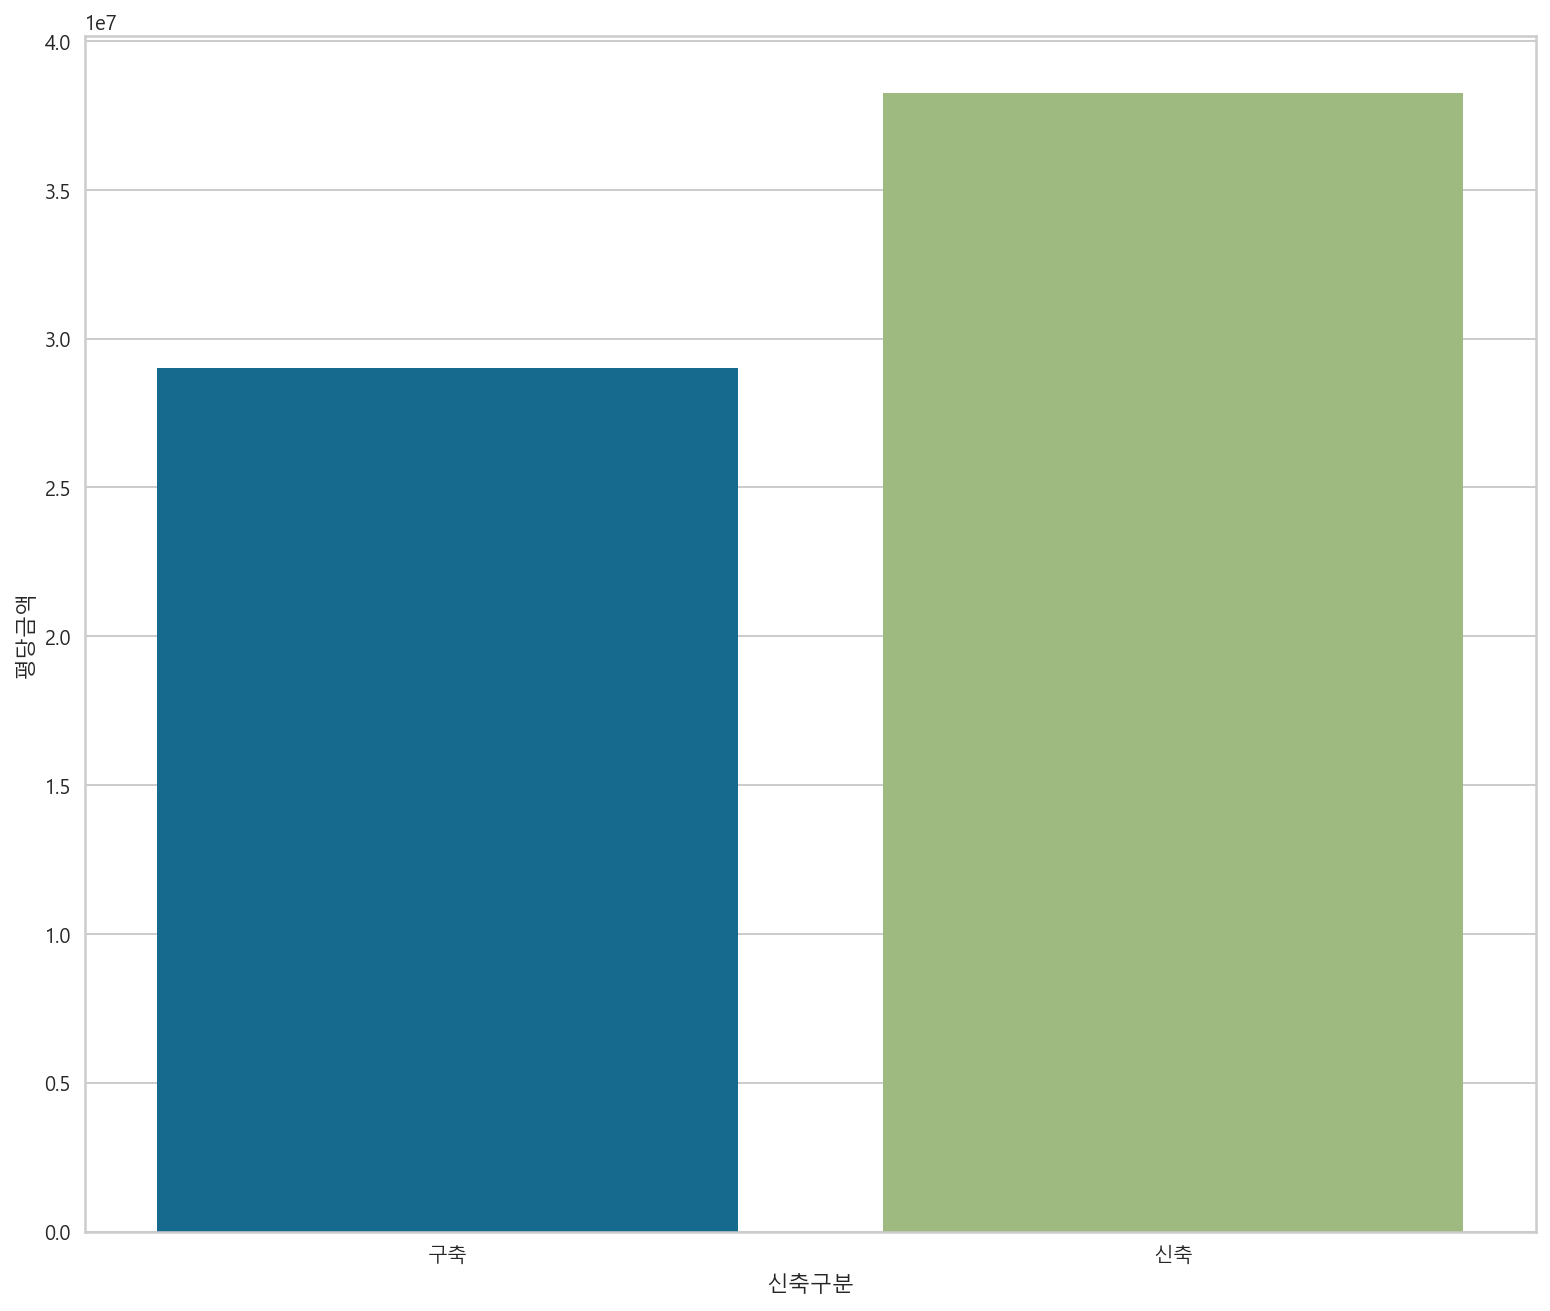

In [414]:
plt.figure(figsize=(13,11))
sns.barplot(data=df,x='신축구분',y='평당금액',ci=None)

<AxesSubplot:xlabel='역세권여부', ylabel='평당금액'>

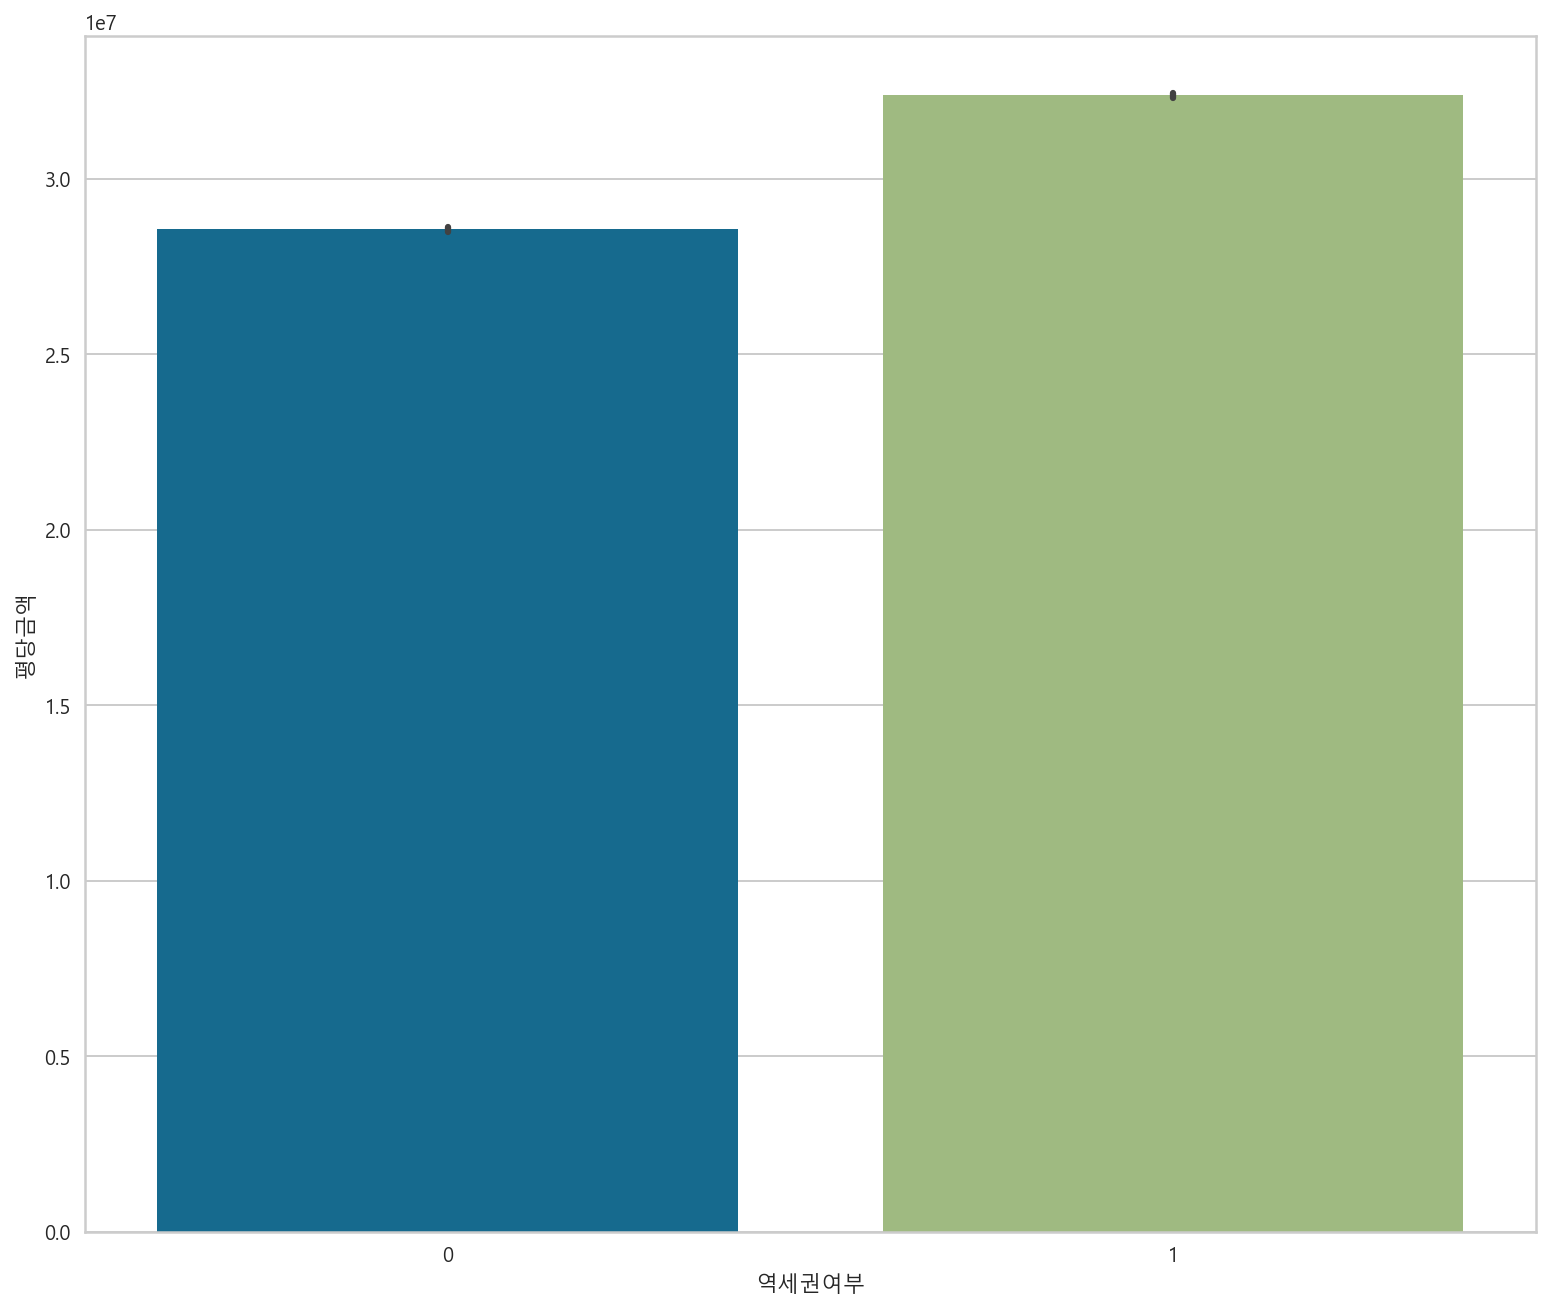

In [415]:
plt.figure(figsize=(13,11))
sns.barplot(data=df,x='역세권여부',y='평당금액')

<AxesSubplot:xlabel='전용면적', ylabel='평당금액'>

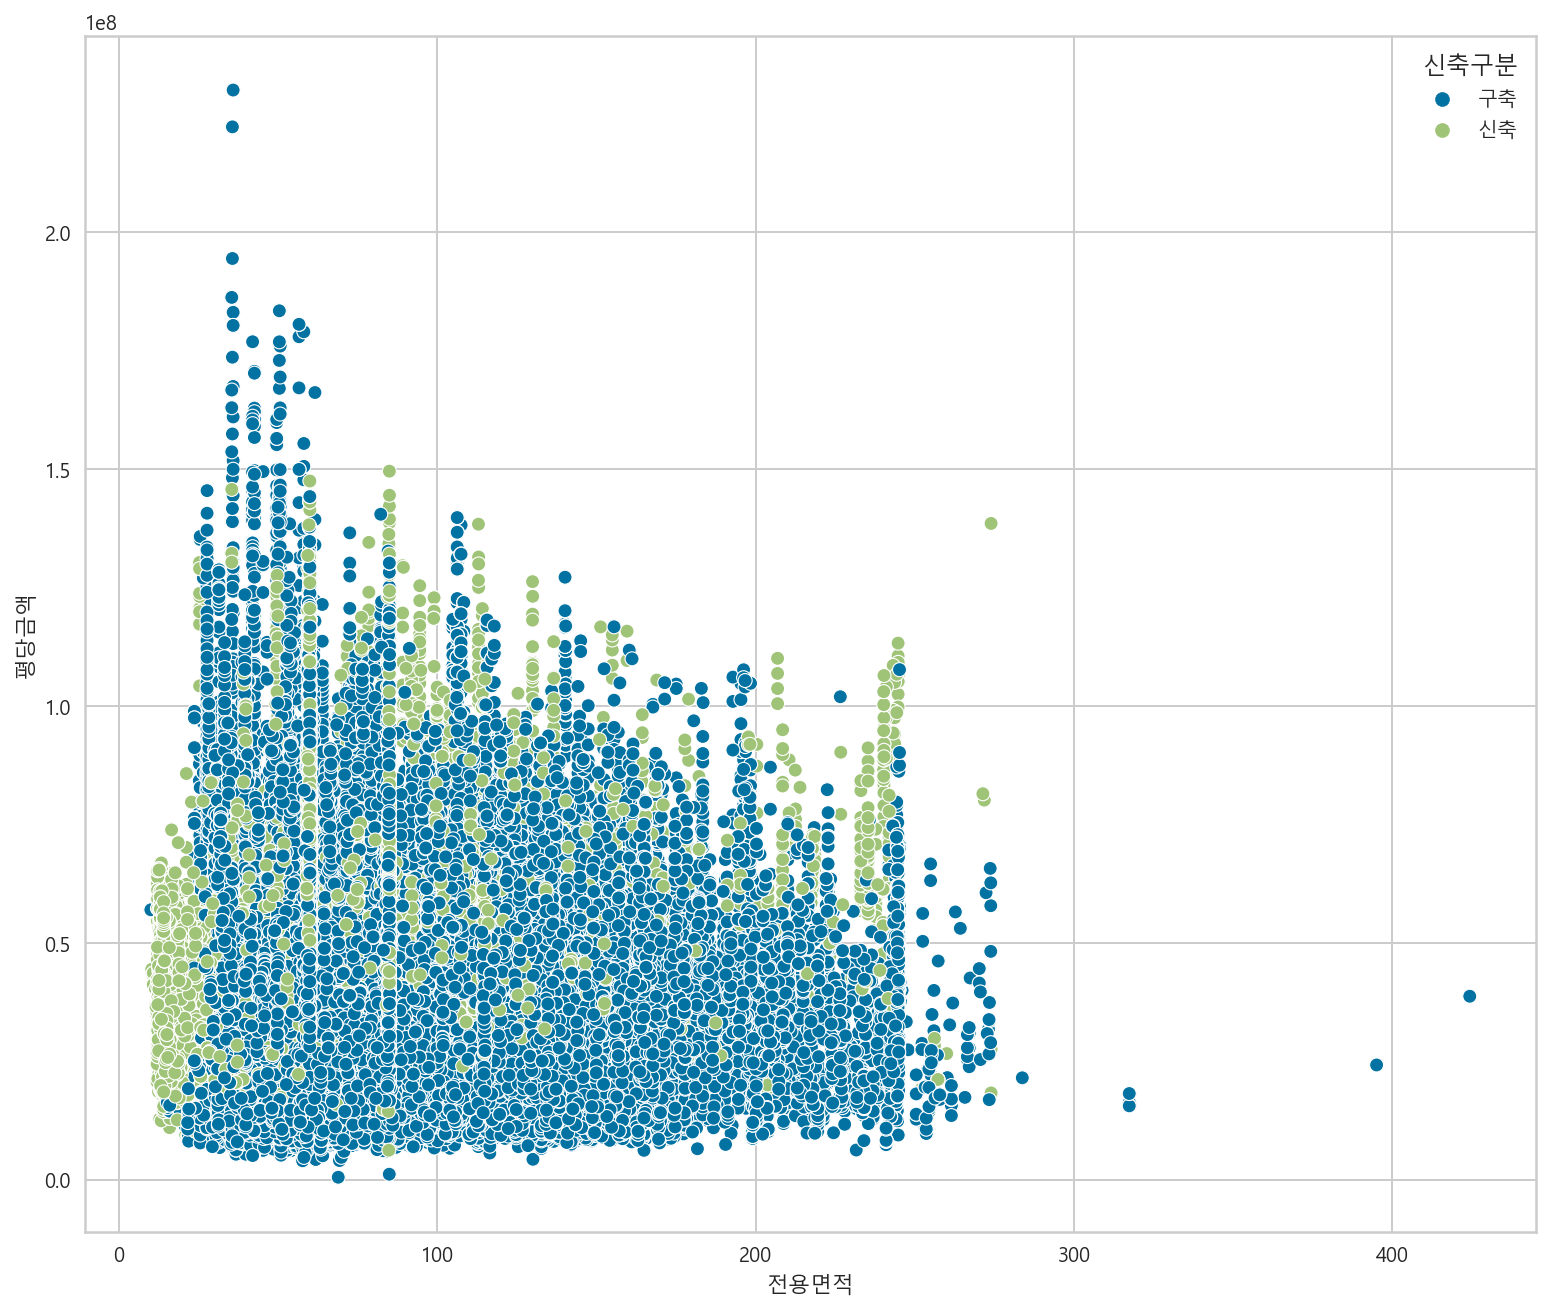

In [411]:
plt.figure(figsize=(13,11))
sns.scatterplot(data=df,x='전용면적',y='평당금액',hue='신축구분')

<AxesSubplot:>

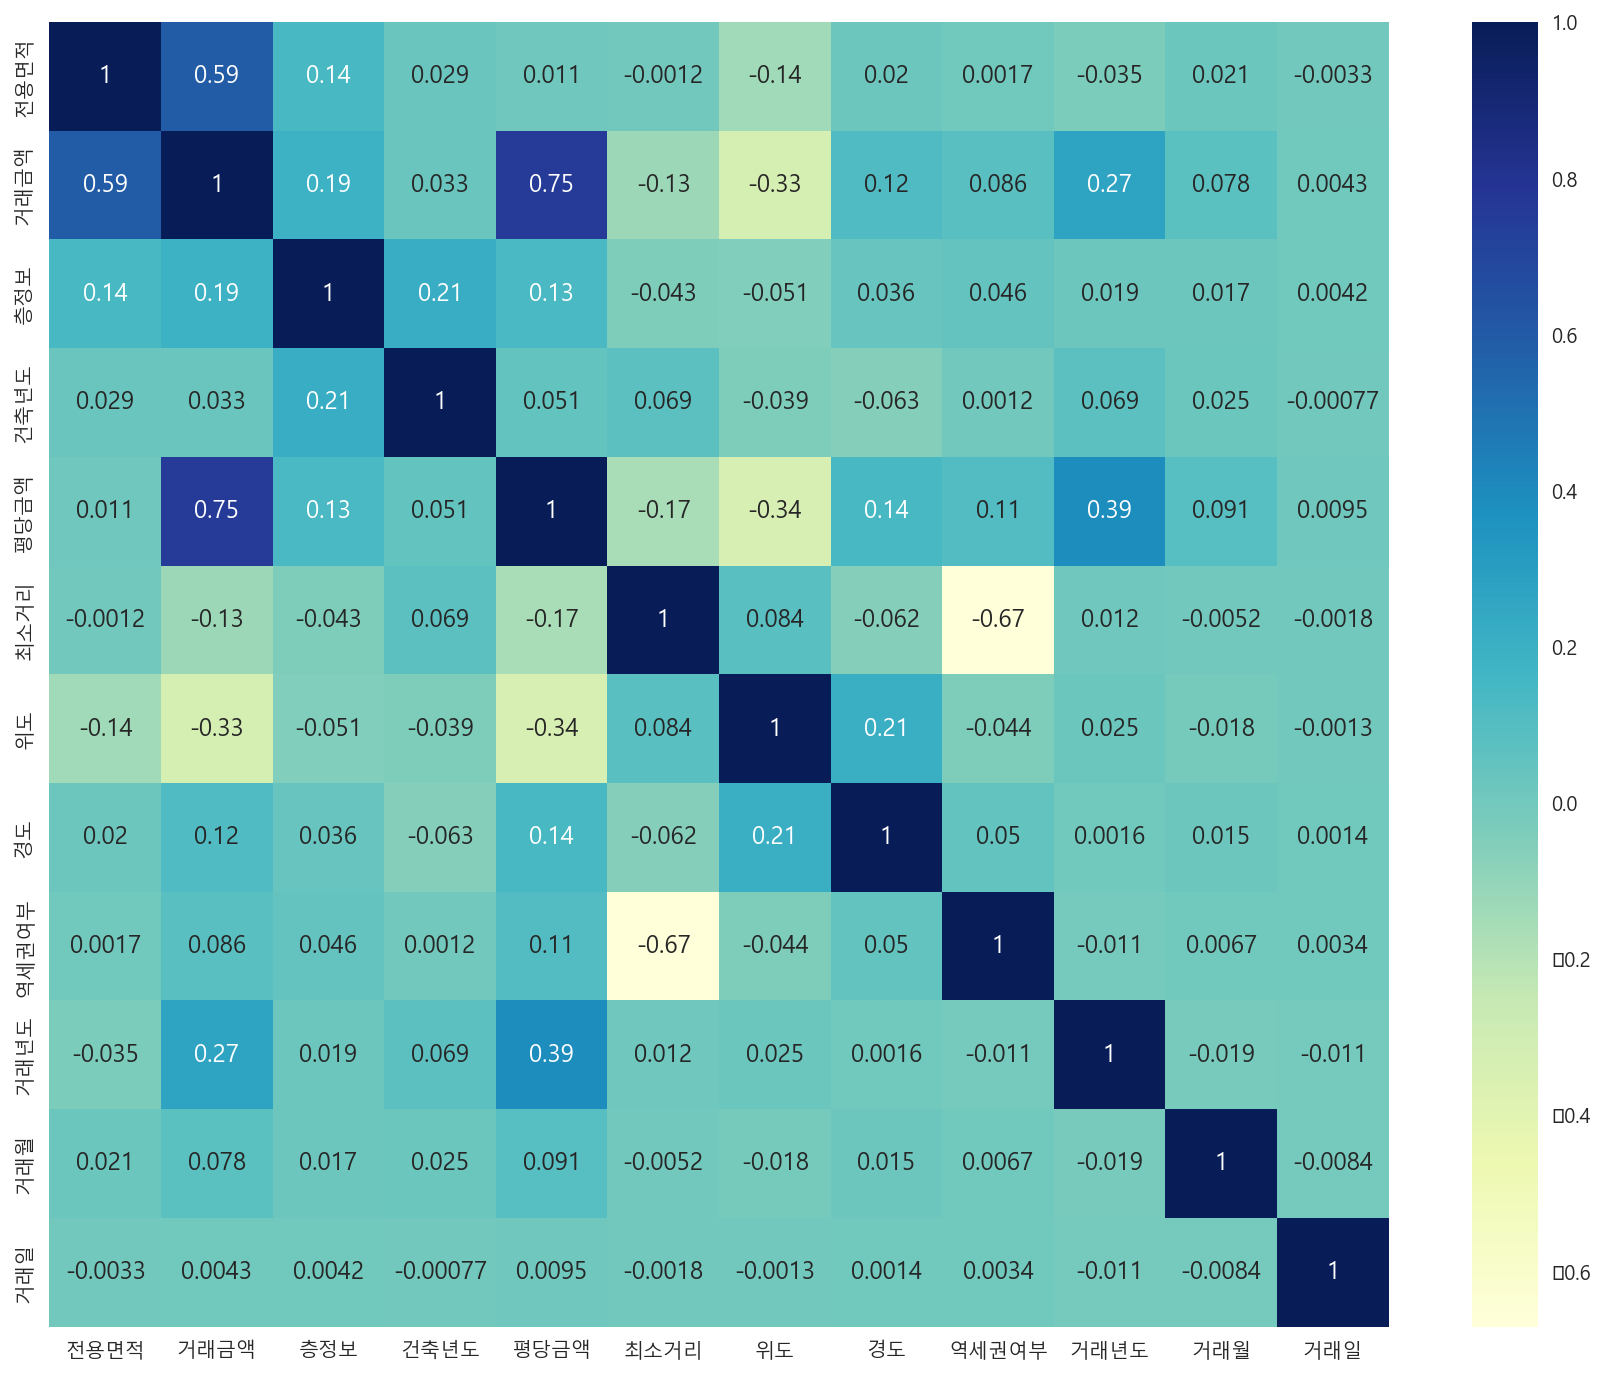

In [419]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [435]:
dd = df.pivot_table(index='자치구',values=['거래금액','평당금액'],columns='역세권여부',
                   aggfunc='mean');dd

거래금액                      평당금액            
역세권여부             0             1           0           1
자치구                                                      
강남구   1386575966.63 1527526152.81 51494389.32 54496901.65
강동구   746273820.91  585158039.28  32219465.66 26362809.38
강북구   457643670.05  471565987.42  19806675.38 22117061.79
강서구   519274487.37  487161796.86  23349395.55 22415671.46
관악구   489882209.34  468296585.93  21535323.17 24044776.91
광진구   915650022.23  757521123.24  33359956.09 30139869.03
구로구   461977754.11  431648890.26  21072074.52 19856567.93
금천구   393620715.06  554696003.33  18983181.58 26157873.83
노원구   449636762.21  414175173.66  21355296.92 21750986.72
도봉구   363619234.86  435981990.80  17587884.50 20088294.73
동대문구  585762644.10  578513189.95  25796231.93 24999207.79
동작구   706661658.45  763709677.09  27846070.38 31228727.50
마포구   713153371.24  876766879.85  32014816.98 36329929.31
서대문구  574954928.26  610620756.88  24360948.25 26876908.30
서초구   1394991313.86 1642129811.06 46607436.91 54608857.67
성동구   840647036.45  851964367.39  32398823.17 35009103.75
성북구   522467128.85  574195057.71  22202101.38 23923375.84
송파구   1047726174.29 952592506.36  42225323.27 36496931.77
양천구   627892088.49  850614581.48  25680399.58 32775605.33
영등포구  653103605.19  728152966.82  27225111.94 29965796.33
용산구   1353774886.74 935739366.16  41119577.89 36315303.31
은평구   526921642.00  441602420.08  21090765.73 21692217.34
종로구   814813725.49  597543517.09  31170894.01 26388961.54
중구    722878914.41  761521003.52  32999868.14 28625306.45
중랑구   442785493.09  403025577.22  19518943.46 19789549.78

In [437]:
dd = df.pivot_table(index='자치구',values=['거래금액','평당금액'],columns='신축구분',
                   aggfunc='mean');dd

거래금액                      평당금액            
신축구분            구축            신축          구축          신축
자치구                                                     
강남구  1487600778.30 1378155628.27 53052806.95 54743727.60
강동구  629000975.49  812627932.23  26703540.47 42270230.37
강북구  457332329.62  480643966.79  19397526.43 26584970.57
강서구  504865702.48  476282145.23  22461658.65 26157239.78
관악구  503037117.65  314093348.37  21342781.17 29417704.28
광진구  851750132.54  782593856.66  31442308.60 38428151.45
구로구  454891511.41  420965664.23  20173235.06 24201126.23
금천구  371696408.43  616737283.85  17257926.28 31152156.29
노원구  429340821.71  448570209.10  21438859.23 26620940.43
도봉구  394540398.16  259839775.28  18481000.99 20854476.38
동대문구 534708351.53  697084996.80  22424564.46 32746733.19
동작구  686706724.78  927933821.19  27535877.50 38062501.00
마포구  739595733.64  1055268070.87 31029219.71 45499611.34
서대문구 510798009.89  787610854.59  21756701.83 34032646.40
서초구  1526814490.62 1526666220.13 49631775.72 58747512.12
성동구  756353936.25  1085064728.52 30395374.10 44155964.21
성북구  524192471.88  677554613.56  21814242.92 30666460.30
송파구  999570365.49  978306938.78  38579113.58 44425088.13
양천구  703234098.06  660970963.15  27950416.76 28416844.99
영등포구 722839850.95  589929970.32  28096308.68 34845294.71
용산구  1095521151.39 1742718112.81 37534292.60 49161863.80
은평구  496477420.62  490112467.66  19392962.83 27323460.89
종로구  674744629.70  562986343.00  24724852.20 37482430.70
중구   734043305.27  827057611.03  26882506.12 34450944.85
중랑구  418728947.32  510729813.90  18538110.49 24295086.18

In [444]:
df

,시군구,법정동명,번지,건물명,전용면적,거래날짜,거래금액,층정보,건축년도,도로명,신축구분,평당금액,최소거리,역명,위도,경도,역세권여부,자치구,호선,거래년도,거래월,거래일
0,서울특별시 중랑구,상봉동,63,건영2차아파트,84.96,2016-01-15,358000000,19,1996,신내로7나길 24,구축,13905367.23,1.07,상봉,37.60,127.10,0,중랑구,경춘선,2016,1,15
1,서울특별시 중랑구,상봉동,63,건영2차아파트,84.96,2016-01-15,358000000,19,1996,신내로7나길 24,구축,13905367.23,1.07,상봉,37.60,127.10,0,중랑구,경의선,2016,1,15
2,서울특별시 중랑구,상봉동,63,건영2차아파트,84.96,2016-01-15,358000000,19,1996,신내로7나길 24,구축,13905367.23,1.07,상봉,37.60,127.10,0,중랑구,07호선,2016,1,15
3,서울특별시 은평구,불광동,643,북한산 힐스테이트7차,84.89,2016-01-26,552000000,15,2011,통일로 796,신축,21458105.10,0.69,녹번,37.60,126.94,0,은평구,03호선,2016,1,26
4,서울특별시 성동구,행당동,345,두산,84.87,2016-01-18,450000000,17,1997,고산자로16길 8-1,구축,17497348.89,0.44,왕십리,37.57,127.04,1,성동구,경의선,2016,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607361,서울특별시 노원구,공릉동,751,대주파크빌아파트,65.77,2021-05-01,555000000,7,2003,섬밭로 52,구축,27847889.55,0.21,태릉입구,37.62,127.07,1,노원구,06호선,2021,5,1
607362,서울특별시 노원구,공릉동,751,대주파크빌아파트,65.77,2021-05-01,555000000,7,2003,섬밭로 52,구축,27847889.55,0.21,태릉입구,37.62,127.07,1,노원구,07호선,2021,5,1
607366,서울특별시 영등포구,영등포동1가,145,내이처해밀,15.08,2021-05-17,140000000,13,2012,경인로114길 62,신축,30644733.35,0.19,신길,37.52,126.92,1,영등포구,01호선,2021,5,17
607367,서울특별시 영등포구,영등포동1가,145,내이처해밀,15.08,2021-05-17,140000000,13,2012,경인로114길 62,신축,30644733.35,0.19,신길,37.52,126.92,1,영등포구,05호선,2021,5,17


<AxesSubplot:xlabel='최소거리', ylabel='Count'>

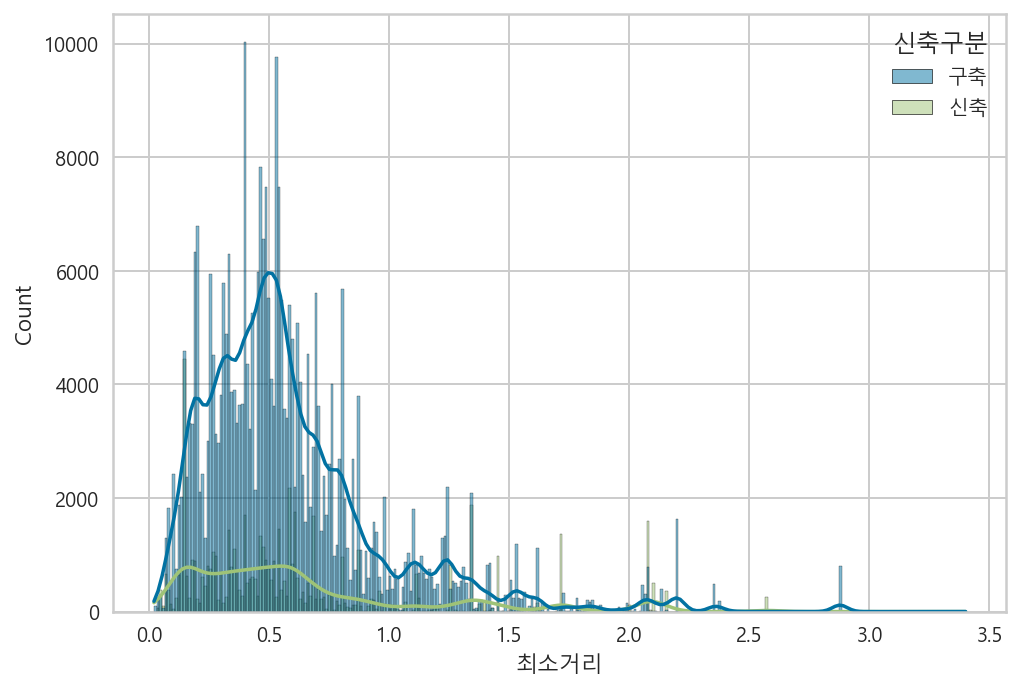

In [443]:
sns.histplot(data=df,x='최소거리',hue='신축구분',kde=True)

<AxesSubplot:xlabel='전용면적', ylabel='Count'>

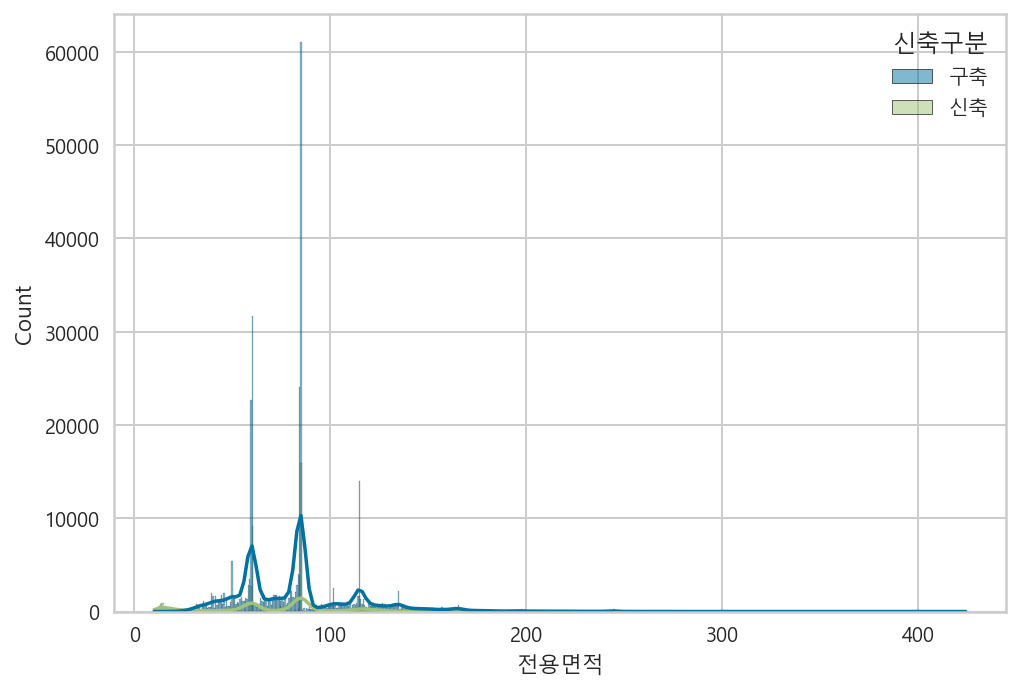

In [445]:
sns.histplot(data=df,x='전용면적',hue='신축구분',kde=True)

In [440]:
stats.chi2_contingency(dd)

(nan,
 nan,
 2760,
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]))

In [489]:
from sklearn.tree     import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
# 학습/검증 데이터 분할 / 매개변수 튜닝 / 교차검증 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# 평가 
from sklearn.metrics import classification_report

In [490]:
df.columns

Index(['시군구', '법정동명', '번지', '건물명', '전용면적', '거래날짜', '거래금액', '층정보', '건축년도', '도로명', '신축구분', '평당금액', '최소거리', '역명', '위도', '경도', '역세권여부', '자치구', '호선', '거래년도', '거래월', '거래일'], dtype='object')

In [491]:
y = df['평당금액']
X = df.drop(columns=['법정동명','시군구','번지', '건물명','거래날짜', '거래금액','도로명','평당금액',
          '위도','경도','역명','거래월','거래일'])

In [492]:
X

,전용면적,층정보,건축년도,신축구분,최소거리,역세권여부,자치구,호선,거래년도
0,84.96,19,1996,구축,1.07,0,중랑구,경춘선,2016
1,84.96,19,1996,구축,1.07,0,중랑구,경의선,2016
2,84.96,19,1996,구축,1.07,0,중랑구,07호선,2016
3,84.89,15,2011,신축,0.69,0,은평구,03호선,2016
4,84.87,17,1997,구축,0.44,1,성동구,경의선,2016
...,...,...,...,...,...,...,...,...,...
607361,65.77,7,2003,구축,0.21,1,노원구,06호선,2021
607362,65.77,7,2003,구축,0.21,1,노원구,07호선,2021
607366,15.08,13,2012,신축,0.19,1,영등포구,01호선,2021
607367,15.08,13,2012,신축,0.19,1,영등포구,05호선,2021


In [493]:
y = np.log1p(y)

In [494]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156)

In [495]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(307012, 9) (307012,)
(76754, 9) (76754,)


In [496]:
from category_encoders.ordinal import OrdinalEncoder
numerical_feats = X.dtypes[X.dtypes != "object"].index.tolist()
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = X.dtypes[X.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

encoder = OrdinalEncoder(categorical_feats)
X_train[categorical_feats] = encoder.fit_transform(X_train[categorical_feats])
X_test[categorical_feats] = encoder.transform(X_test[categorical_feats])

Number of Numerical features:  6
Number of Categorical features:  3


In [497]:
y.skew()

0.3976916451948285

In [498]:
from sklearn.preprocessing import *

In [499]:
# /.remove('income_total')
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [504]:
lr = LinearRegression()

In [505]:
lr.fit(X_train,y_train)

LinearRegression()

In [507]:
pred=lr.predict(X_test)

In [500]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=5,random_state=42,oob_score=True)

In [501]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=42)

In [502]:
pred=rf.predict(X_test)

In [508]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.1690652628071689
0.411175464743665


In [509]:
print(lr.coef_,lr.intercept_)

[ 0.01474945  0.06787369 -0.05094409  0.12532147 -0.09148896  0.00427126
  0.00577011  0.0502955   0.20070504] 17.104802583321195


In [ ]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label = 'Train Data')
# train 데이터 값을 o으로 표현

ax.plot(X_test,pred, 'r+', label = 'Predicted Value')
# 예측한 값을 + 로 표현

ax.legend(loc = 'best')

plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

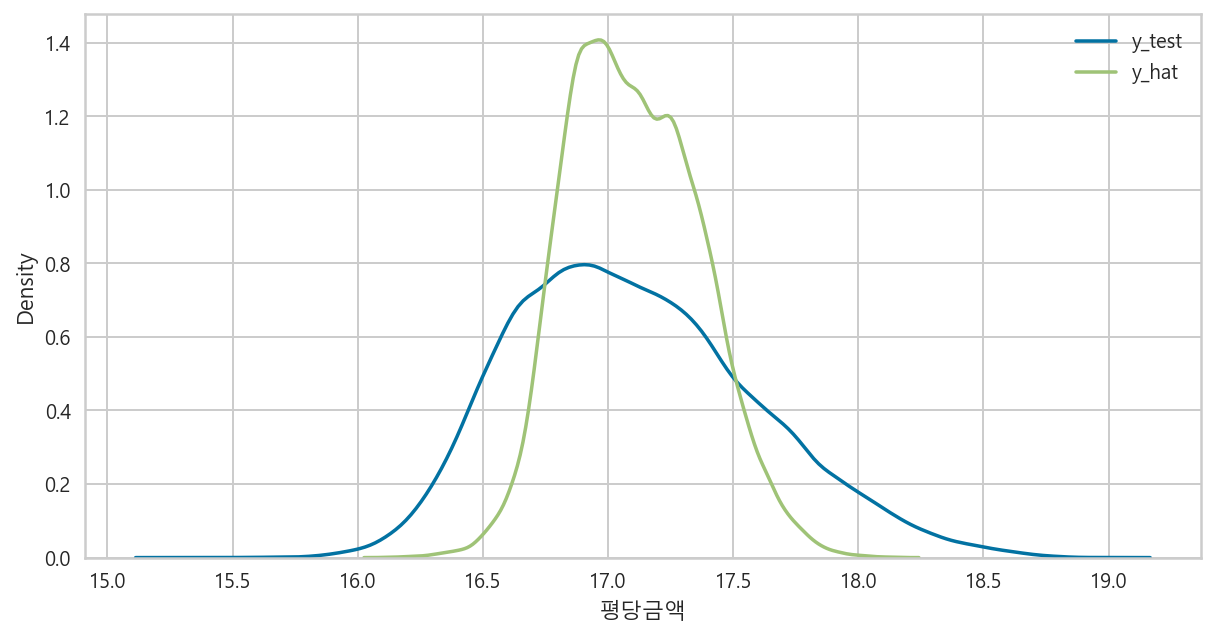

In [514]:
pred = lr.predict(X_test)

plt.figure(figsize = (10,5))

ax1 = sns.distplot(y_test, hist= False, label = "y_test")
# 실제 y값

ax2 = sns.distplot(pred, hist=False, label = "y_hat", ax = ax1)
# 예측한 y값

plt.legend()
plt.show()